In [201]:
import numpy as np
import pandas as pd

In [219]:
df = pd.read_csv('/content/newfile.csv')

In [220]:
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,label,text,label_num
3260,3260,1830,confirmaffirm,MT 515(FUNDS)\nSettlement Date\nSecurities Loa...,0
4270,4270,3202,confirmaffirm,MT 515\nTrade affirmation Summary Report\nTrad...,0
1612,1612,314,confirmaffirm,Confirmation Details\nTrade affirmation Summar...,0
2503,2503,3221,settlementSuccess,Account#1242 Settlement Completed\nSettlement ...,0
2455,2455,143,confirmletter,Confirmation of Funds certificate\nWe the unde...,0


In [221]:
df.shape

(5171, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  5171 non-null   int64 
 1   Unnamed: 0    5171 non-null   int64 
 2   label         5171 non-null   object
 3   text          5171 non-null   object
 4   label_num     5171 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 202.1+ KB


In [223]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0.1'],inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns=['label_num'],inplace=True)

In [224]:
df.sample(5)

,label,text
4134,confirmaffirm,MT 518\nTrade affirmation Summary Report\nTrad...
500,confirmaffirm,MT 517\nTrade affirmation Summary Report\nTrad...
3864,confirmaffirm,MT 515(FUNDS)\nTrade affirmation Summary Repor...
2086,confirmaffirm,MT 517\nTrade affirmation Summary Report\nTrad...
1008,confirmaffirm,MT 516\nSettlement Date\nClient Confirmation o...


In [225]:
# renaming the cols
df.rename(columns={'label':'Category','text':'text'},inplace=True)
df.sample(5)

,Category,text
3189,settlementSuccess,Account#1242 Settlement Completed\nSettlement ...
4222,confirmaffirm,MT 517\nSettlement Date\nClient Confirmation o...
3158,confirmaffirm,MT 516\nTrade affirmation Summary Report\nSecu...
4114,confirmaffirm,MT 517\nTrade Date\nTrade Confirmation Affirma...
3267,settlementFailure,Account#1242 Insufficient Funds\nInsufficient ...


In [226]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [227]:
df['Category'] = encoder.fit_transform(df['Category'])

In [228]:
df.head()

,Category,text
0,0,Confirmation Details\nTrade Date\nSecurities L...
1,2,Account#1242 Mandate Rejected\nProvided Mandat...
2,0,Confirmation Details\nTrade Date\nTrade Confir...
3,3,Account#1242 Settlement Cleared\nSettlement is...
4,0,MT 518\nSettlement Date\nSecurities Loan Confi...


In [229]:
# missing values
df.isnull().sum()

Category    0
text        0
dtype: int64

In [230]:
# check for duplicate values
df.duplicated().sum()

501

In [214]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [215]:
df.duplicated().sum()

0

In [231]:
df.shape

(5171, 2)

## 2.EDA

In [232]:
df.head()

,Category,text
0,0,Confirmation Details\nTrade Date\nSecurities L...
1,2,Account#1242 Mandate Rejected\nProvided Mandat...
2,0,Confirmation Details\nTrade Date\nTrade Confir...
3,3,Account#1242 Settlement Cleared\nSettlement is...
4,0,MT 518\nSettlement Date\nSecurities Loan Confi...


In [233]:
df['Category'].value_counts()

0    2586
2    1034
3    1034
1     517
Name: Category, dtype: int64

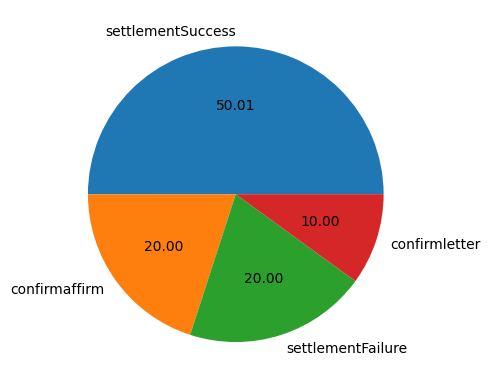

In [234]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['settlementSuccess','confirmaffirm','settlementFailure','confirmletter'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [235]:
import nltk

In [236]:
!pip install nltk

In [237]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [238]:
df['num_characters'] = df['text'].apply(len)

In [239]:
df.head()

,Category,text,num_characters
0,0,Confirmation Details\nTrade Date\nSecurities L...,148
1,2,Account#1242 Mandate Rejected\nProvided Mandat...,142
2,0,Confirmation Details\nTrade Date\nTrade Confir...,124
3,3,Account#1242 Settlement Cleared\nSettlement is...,172
4,0,MT 518\nSettlement Date\nSecurities Loan Confi...,125


In [240]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [241]:
df.head()

,Category,text,num_characters,num_words
0,0,Confirmation Details\nTrade Date\nSecurities L...,148,18
1,2,Account#1242 Mandate Rejected\nProvided Mandat...,142,20
2,0,Confirmation Details\nTrade Date\nTrade Confir...,124,15
3,3,Account#1242 Settlement Cleared\nSettlement is...,172,25
4,0,MT 518\nSettlement Date\nSecurities Loan Confi...,125,17


In [242]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [243]:
df.head()

,Category,text,num_characters,num_words,num_sentences
0,0,Confirmation Details\nTrade Date\nSecurities L...,148,18,1
1,2,Account#1242 Mandate Rejected\nProvided Mandat...,142,20,1
2,0,Confirmation Details\nTrade Date\nTrade Confir...,124,15,1
3,3,Account#1242 Settlement Cleared\nSettlement is...,172,25,1
4,0,MT 518\nSettlement Date\nSecurities Loan Confi...,125,17,1


In [244]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,156.286405,21.734094,1.063817
std,36.690954,6.609520,0.244451
min,90.000000,12.000000,1.000000
25%,132.000000,17.000000,1.000000
50%,149.000000,20.000000,1.000000
75%,172.000000,24.000000,1.000000
max,288.000000,44.000000,2.000000


In [245]:
# ham
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2586.000000,2586.000000,2586.0
mean,138.725058,18.658933,1.0
std,15.756065,3.113282,0.0
min,108.000000,15.000000,1.0
25%,127.000000,16.000000,1.0
50%,137.000000,18.000000,1.0
75%,149.000000,21.000000,1.0
max,186.000000,28.000000,1.0


In [246]:
#spam
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,517.000000,517.000000,517.0
mean,186.702128,27.675048,1.0
std,85.944638,15.493523,0.0
min,90.000000,12.000000,1.0
25%,104.000000,13.000000,1.0
50%,117.000000,13.000000,1.0
75%,274.000000,43.000000,1.0
max,288.000000,44.000000,1.0


In [247]:
#spam
df[df['Category'] == 2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1034.000000,1034.000000,1034.0
mean,165.433269,23.545455,1.0
std,24.943380,4.394880,0.0
min,125.000000,19.000000,1.0
25%,142.000000,19.000000,1.0
50%,165.000000,23.000000,1.0
75%,189.000000,27.000000,1.0
max,218.000000,33.000000,1.0


In [248]:
#spam
df[df['Category'] == 3][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1034.000000,1034.000000,1034.000000
mean,175.852031,24.643133,1.319149
std,10.128715,1.438415,0.466372
min,158.000000,23.000000,1.000000
25%,170.000000,24.000000,1.000000
50%,174.000000,24.000000,1.000000
75%,179.000000,25.000000,2.000000
max,199.000000,28.000000,2.000000


In [249]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

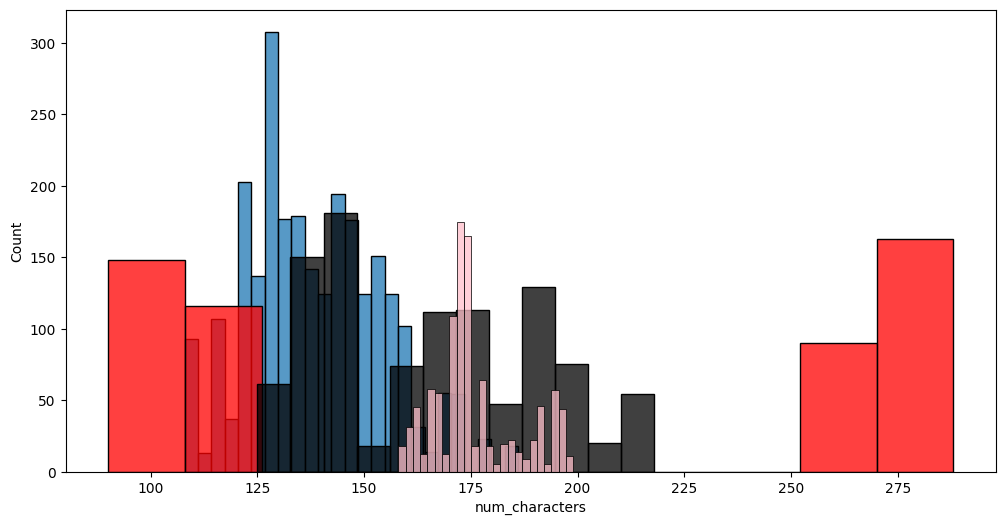

In [111]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')
sns.histplot(df[df['Category'] == 2]['num_characters'],color='black')
sns.histplot(df[df['Category'] == 3]['num_characters'],color='pink')

<Axes: xlabel='num_words', ylabel='Count'>

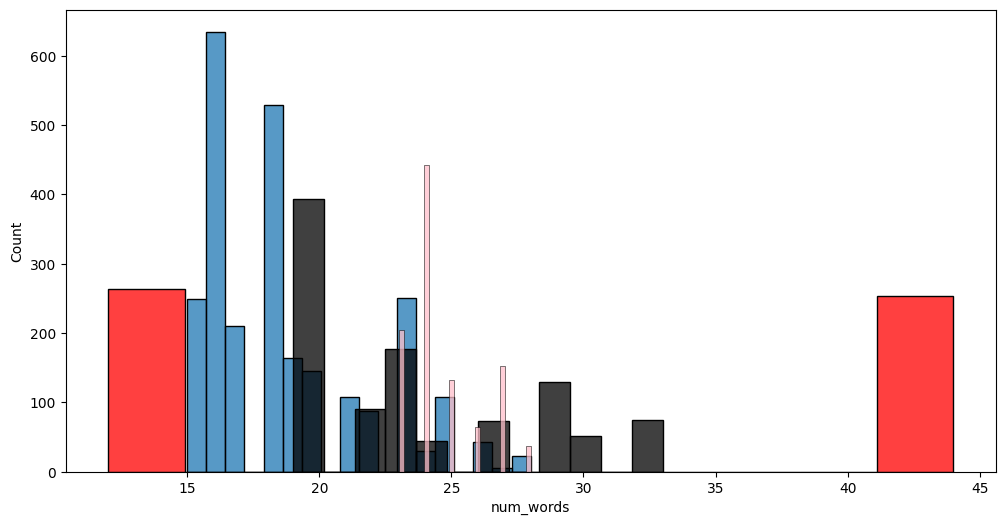

In [112]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'],color='red')
sns.histplot(df[df['Category'] == 2]['num_words'],color='black')
sns.histplot(df[df['Category'] == 3]['num_words'],color='pink')

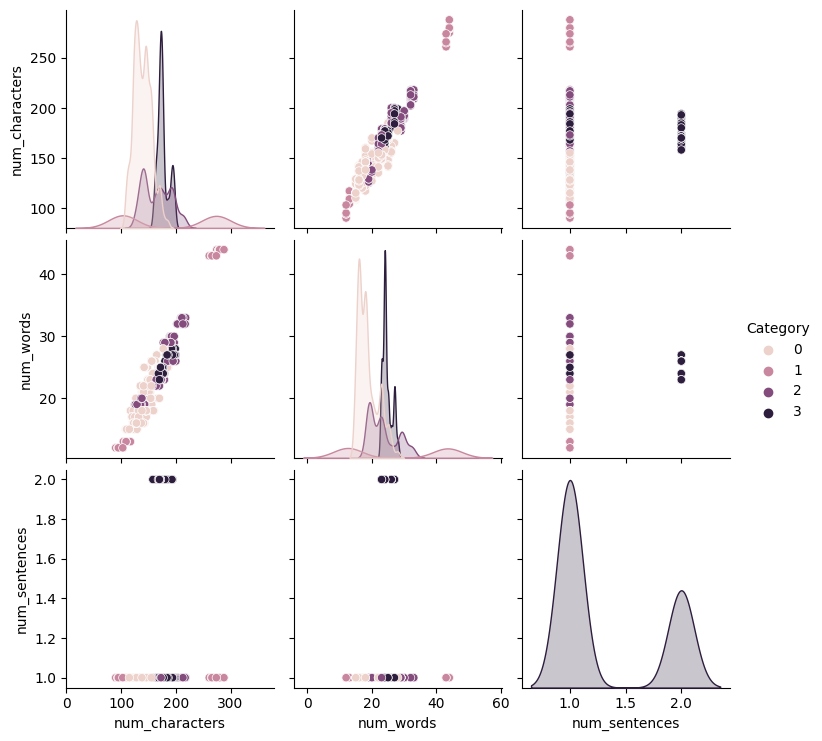

In [113]:
sns.pairplot(df,hue='Category')

<ipython-input-250-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

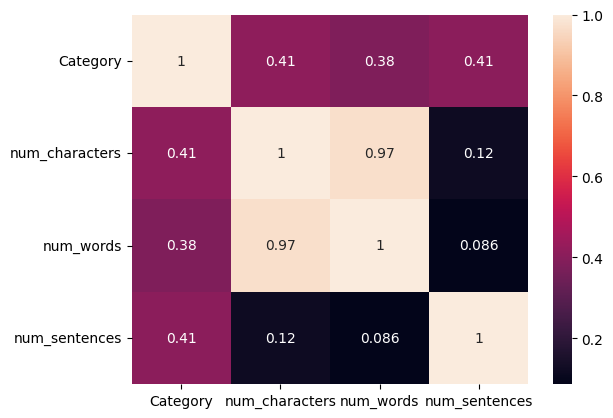

In [250]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [251]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [252]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') :
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [253]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [255]:
df['text'][10]

'MT 515\nTrade Date\nSecurities Loan Confirmation of Bonds worth 4564706301 GGP\nsee the following attachment \nConfirmation statement.json'

In [256]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [257]:
df['transformed_text'] = df['text'].apply(transform_text)

In [258]:
df.head()

,Category,text,num_characters,num_words,num_sentences,transformed_text
0,0,Confirmation Details\nTrade Date\nSecurities L...,148,18,1,confirm detail trade date secur loan confirm b...
1,2,Account#1242 Mandate Rejected\nProvided Mandat...,142,20,1,account 1242 mandat reject provid mandat rejec...
2,0,Confirmation Details\nTrade Date\nTrade Confir...,124,15,1,confirm detail trade date trade confirm affirm...
3,3,Account#1242 Settlement Cleared\nSettlement is...,172,25,1,account 1242 settlement clear settlement clear...
4,0,MT 518\nSettlement Date\nSecurities Loan Confi...,125,17,1,mt 518 settlement date secur loan confirm bond...


In [259]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [260]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))

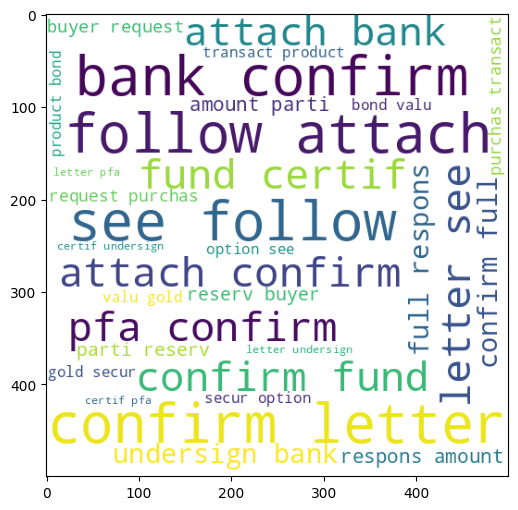

In [261]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [262]:
ham_wc = wc.generate(df[df['Category'] == 3]['transformed_text'].str.cat(sep=" "))

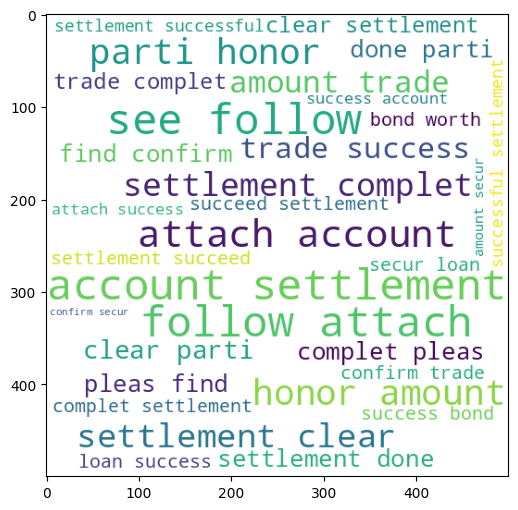

In [263]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [264]:
df.head()

,Category,text,num_characters,num_words,num_sentences,transformed_text
0,0,Confirmation Details\nTrade Date\nSecurities L...,148,18,1,confirm detail trade date secur loan confirm b...
1,2,Account#1242 Mandate Rejected\nProvided Mandat...,142,20,1,account 1242 mandat reject provid mandat rejec...
2,0,Confirmation Details\nTrade Date\nTrade Confir...,124,15,1,confirm detail trade date trade confirm affirm...
3,3,Account#1242 Settlement Cleared\nSettlement is...,172,25,1,account 1242 settlement clear settlement clear...
4,0,MT 518\nSettlement Date\nSecurities Loan Confi...,125,17,1,mt 518 settlement date secur loan confirm bond...


In [265]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [266]:
len(spam_corpus)

8448

In [267]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [268]:
len(ham_corpus)

37557

In [269]:
# Text Vectorization
# using Bag of Words
df.head()

,Category,text,num_characters,num_words,num_sentences,transformed_text
0,0,Confirmation Details\nTrade Date\nSecurities L...,148,18,1,confirm detail trade date secur loan confirm b...
1,2,Account#1242 Mandate Rejected\nProvided Mandat...,142,20,1,account 1242 mandat reject provid mandat rejec...
2,0,Confirmation Details\nTrade Date\nTrade Confir...,124,15,1,confirm detail trade date trade confirm affirm...
3,3,Account#1242 Settlement Cleared\nSettlement is...,172,25,1,account 1242 settlement clear settlement clear...
4,0,MT 518\nSettlement Date\nSecurities Loan Confi...,125,17,1,mt 518 settlement date secur loan confirm bond...


## 4. Model Building

In [270]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [271]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [272]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [273]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [274]:
X.shape

(5171, 3000)

In [275]:
y = df['Category'].values

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [278]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [279]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [280]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,pos_label='positive',average='micro'))

1.0
[[515   0   0   0]
 [  0  99   0   0]
 [  0   0 201   0]
 [  0   0   0 220]]
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [281]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,pos_label='positive',average='weighted'))

1.0
[[515   0   0   0]
 [  0  99   0   0]
 [  0   0 201   0]
 [  0   0   0 220]]
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [282]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,pos_label='positive',average='micro'))

1.0
[[515   0   0   0]
 [  0  99   0   0]
 [  0   0 201   0]
 [  0   0   0 220]]
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# tfidf --> MNB

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [284]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [285]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [286]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,pos_label='positive',average='micro')

    return accuracy,precision

In [287]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


(1.0, 1.0)

In [288]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  SVC
Accuracy -  1.0
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  KN
Accuracy -  1.0
Precision -  1.0
For  NB
Accuracy -  1.0
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  DT
Accuracy -  1.0
Precision -  1.0
For  LR
Accuracy -  1.0
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  RF
Accuracy -  1.0
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  AdaBoost
Accuracy -  0.6917874396135266
Precision -  0.6917874396135266


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  BgC
Accuracy -  1.0
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  ETC
Accuracy -  1.0
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  GBDT
Accuracy -  1.0
Precision -  1.0
For  xgb
Accuracy -  1.0
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [289]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [290]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,1.000000,1.000000
1,KN,1.000000,1.000000
2,NB,1.000000,1.000000
3,DT,1.000000,1.000000
4,LR,1.000000,1.000000
5,RF,1.000000,1.000000
7,BgC,1.000000,1.000000
8,ETC,1.000000,1.000000
9,GBDT,1.000000,1.000000
10,xgb,1.000000,1.000000


In [291]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [292]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,1.000000
1,KN,Accuracy,1.000000
2,NB,Accuracy,1.000000
3,DT,Accuracy,1.000000
4,LR,Accuracy,1.000000
5,RF,Accuracy,1.000000
6,BgC,Accuracy,1.000000
7,ETC,Accuracy,1.000000
8,GBDT,Accuracy,1.000000
9,xgb,Accuracy,1.000000


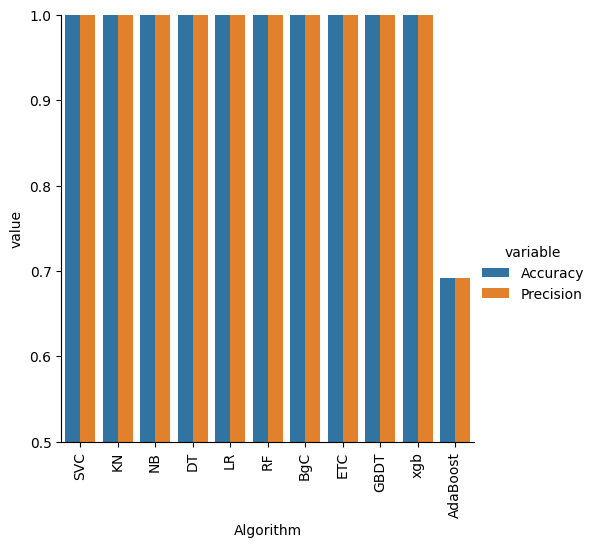

In [293]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [294]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [295]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [296]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [297]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [298]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [299]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,KN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,NB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,DT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,LR,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,BgC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,ETC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,GBDT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,xgb,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [301]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [302]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [303]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [304]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy 1.0
Precision 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [305]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [306]:
from sklearn.ensemble import StackingClassifier

In [307]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [308]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy 1.0
Precision 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [309]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))